In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2568 - accuracy: 0.9262
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1039 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0725 - accuracy: 0.9768


In [7]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.0937 - accuracy: 0.9713
0.09373215585947037 0.9713000059127808


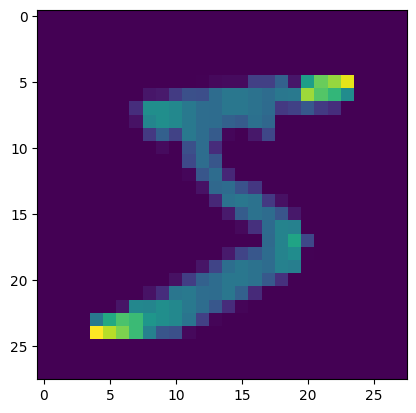

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [9]:
# save the model
model.save('models/epic_num_reader.model')

INFO:tensorflow:Assets written to: models/epic_num_reader.model\assets


INFO:tensorflow:Assets written to: models/epic_num_reader.model\assets


In [10]:
new_model = tf.keras.models.load_model('models/epic_num_reader.model')

In [11]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 2s 5ms/step
[[1.10938403e-09 5.57597701e-08 9.54403276e-07 ... 9.99956250e-01
  2.83091950e-08 5.76561069e-06]
 [2.91286606e-10 1.20209625e-04 9.99863863e-01 ... 4.42496839e-09
  2.21579000e-07 1.15498095e-12]
 [7.54705241e-07 9.98751998e-01 1.83556476e-05 ... 4.66805650e-04
  1.48118401e-04 1.29441332e-05]
 ...
 [7.95392552e-09 1.23430652e-07 1.24840597e-07 ... 1.70350231e-05
  3.49806396e-05 1.06077583e-03]
 [2.99056751e-07 6.35688048e-06 6.97638654e-07 ... 1.54604402e-06
  1.33197347e-03 1.94077554e-08]
 [9.71613616e-08 4.62162362e-08 1.51598073e-07 ... 4.18334395e-10
  3.45429214e-07 8.31312175e-09]]


In [12]:
import numpy as np

print(np.argmax(predictions[0]))

7


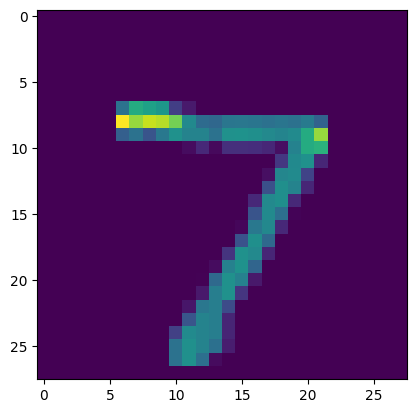

In [13]:
plt.imshow(x_test[0])
plt.show()